In [10]:
import pickle 
import glob
import os 
from tqdm import tqdm
import pandas as pd 
import matplotlib.pyplot as plt 
import pympi.Elan 

import itertools # 効率的なループ実行のためのイテレータ生成関数のインポート import matplotlib.pyplot as plt # グラフ描画ライブラリ
import seaborn as sns # データの可視化を行うライブラリ
sns.set() # デフォルトスタイルにseabornを適用
from scipy.stats import pearsonr # 科学技術計算ライブラリ
import numpy as np # 数値計算を効率的に行うための拡張モジュール


with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    SS, TS, SP, TP, text, audio, visual, vid = pickle.load(f, encoding='utf-8')

def calc_p(df):
    for i, j in itertools.combinations(df, 2): #組み合わせでforループを実行
        x = df.loc[:,[i]].values
        y = df.loc[:,[j]].values
        a, b = pearsonr(np.ravel(x), np.ravel(y)) # リストを整形し相関係数:aとp値:bの計算
        if 0 != b.round(10) < 0.01: # p値 < 0.05
            print("=" * 45)
            print(i + "----" + j)
            print("相関係数:", a.round(4))
            print("p値:", b.round(4))
            plt.show()

In [11]:
E, A, C, N, O = [], [], [], [], []

acc = {'1911F2001': 0.5492957746478874, '1911F2002': 0.8053097345132744, '1911F3001': 0.5135135135135135, '1911F3002': 0.7142857142857143, '1911F3003': 0.7346938775510204, '1911F4001': 0.5670103092783505, '1911F4002': 0.6909090909090909, '1911F4003': 0.6, '1911F5001': 0.33636363636363636, '1911F5002': 0.6814159292035398, '1911F6001': 0.7037037037037037, '1911F6002': 0.5357142857142857, '1911F6003': 0.3333333333333333, '1911F7002': 0.29896907216494845, '1911M2001': 0.3541666666666667, '1911M2002': 0.6435643564356436, '1911M2003': 0.6428571428571429, '1911M4001': 0.7789473684210526, '1911M4002': 0.5327102803738317, '1911M5001': 0.5480769230769231, '1911M5002': 0.8701298701298701, '1911M6001': 0.648936170212766, '1911M6002': 0.6666666666666666, '1911M6003': 0.5272727272727272, '1911M7001': 0.6868686868686869, '1911M7002': 0.6}
Acc = []

for id in vid:
    Acc.append(acc[id])
    E.append(SP[id][0])
    A.append(SP[id][1])
    C.append(SP[id][2])
    N.append(SP[id][3])
    O.append(SP[id][4])

df = pd.DataFrame(
    {
        "Acc": Acc,
        "E": E, 
        "A": A,
        "C": C,
        "N": N, 
        "O": O
    }
)

calc_p(df)
df.corr()


A----O
相関係数: -0.6577
p値: 0.0003


,Acc,E,A,C,N,O
Acc,1.000000,0.127002,-0.251457,0.011816,-0.302116,0.227317
E,0.127002,1.000000,-0.164812,0.325806,-0.169338,0.160088
A,-0.251457,-0.164812,1.000000,0.029440,-0.060717,-0.657664
C,0.011816,0.325806,0.029440,1.000000,-0.337590,-0.017963
N,-0.302116,-0.169338,-0.060717,-0.337590,1.000000,0.087360
O,0.227317,0.160088,-0.657664,-0.017963,0.087360,1.000000


In [25]:
Corr, E, A, C, N, O = [], [], [], [], [], []
for id in vid:
    df = pd.DataFrame(
        {
            "ss": SS[id],
            "ts": TS[id]
        }
    )
    cor = round(df.corr()["ts"]["ss"], 2)
    Corr.append(cor)
    E.append(TP[id][0])
    A.append(TP[id][1])
    C.append(TP[id][2])
    N.append(TP[id][3])
    O.append(TP[id][4])

df = pd.DataFrame(
    {
        "Corr": Corr,
        "E": E, 
        "A": A,
        "C": C,
        "N": N, 
        "O": O
    }
)

calc_p(df)
df.corr()

,Corr,E,A,C,N,O
Corr,1.000000,-0.085604,0.328922,0.013248,-0.009344,-0.138017
E,-0.085604,1.000000,0.001318,-0.069909,-0.146399,0.575051
A,0.328922,0.001318,1.000000,0.438614,-0.327133,0.211240
C,0.013248,-0.069909,0.438614,1.000000,-0.719623,0.284352
N,-0.009344,-0.146399,-0.327133,-0.719623,1.000000,-0.411879
O,-0.138017,0.575051,0.211240,0.284352,-0.411879,1.000000


In [48]:
E, A, C, N, O = {}, {}, {}, {}, {}
E3, A3, C3, N3, O3 = {}, {}, {}, {}, {}
neg_r = {}
neu_r = {}
pos_r = {}
for id in vid:
    E[id], A[id], C[id], N[id], O[id] = SP[id][0], SP[id][1],SP[id][2],SP[id][3],SP[id][4]
    E3[id], A3[id], C3[id], N3[id], O3[id] = TP[id][0], TP[id][1],TP[id][2],TP[id][3],TP[id][4]
    neg_c, neu_c, pos_c = 0, 0, 0
    for s in SS[id]:
        if s == 0:
            neg_c += 1
        elif s == 1:
            neu_c += 1
        else:
            pos_c += 1
    sum = neg_c + neu_c + pos_c
    neg_r[id], neu_r[id], pos_r[id] =  neg_c / sum , neu_c / sum, pos_c / sum

# df = pd.DataFrame(
#     {
#         "selfE": E,
#         "selfA": A,
#         "selfC": C,
#         "selfN": N,
#         "selfO": O,
#         "neg_r": neg_r,
#         "neu_r": neu_r,
#         "pos_r": pos_r,
#         "thirdE": E3,
#         "thirdA": A3,
#         "thirdC": C3,
#         "thirdN": N3,
#         "thirdO": O3,
#     }
# )

df = pd.DataFrame(
    {
        ""
    }
)

# calc_p(df)
df

,selfE,selfA,selfC,selfN,selfO,neg_r,neu_r,pos_r,thirdE,thirdA,thirdC,thirdN,thirdO
1911F2001,8,9,3,10,12,0.253521,0.267606,0.478873,12.4,12.4,6.6,8.4,9.8
1911F2002,11,11,5,5,8,0.389381,0.610619,0.000000,10.4,11.2,8.0,6.8,7.2
1911F3001,11,11,6,13,11,0.310811,0.418919,0.270270,7.2,13.2,11.0,5.2,8.6
1911F3002,10,13,7,8,12,0.545455,0.298701,0.155844,6.4,9.6,9.0,6.8,9.8
1911F3003,12,9,8,12,12,0.612245,0.173469,0.214286,8.0,12.0,11.2,5.8,8.4
1911F4001,12,13,9,8,6,0.237113,0.680412,0.082474,11.0,12.6,10.4,4.6,9.8
1911F4002,13,5,10,8,13,0.200000,0.681818,0.118182,12.4,10.2,9.6,5.2,11.0
1911F4003,12,11,4,8,7,0.122222,0.322222,0.555556,12.8,12.4,9.4,5.2,10.2
1911F5001,8,12,9,7,10,0.027273,0.081818,0.890909,11.0,13.4,11.0,4.2,10.2
1911F5002,12,8,11,8,13,0.398230,0.415929,0.185841,9.6,10.2,10.6,4.8,8.4


In [ ]:
for id in vid:
    text = pd.read_csv(f"../../data/results/self/t/{id}.csv")
    rtext = text.loc[:, "text"].values.tolist()
    SS = text.loc[:, "SS"].values.tolist() 
    t = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/self/a/{id}.csv")
    a = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/self/v/{id}.csv")
    v = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/self/tav/{id}.csv")
    tav = multi.loc[:, "pred"].values.tolist()
    
    text = pd.read_csv(f"../../data/results/third/t/{id}.csv")
    TS = text.loc[:, "SS"].values.tolist() 
    t3 = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/third/a/{id}.csv")
    a3 = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/third/v/{id}.csv")
    v3 = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/third/tav/{id}.csv")
    tav3 = multi.loc[:, "pred"].values.tolist()

    df = pd.DataFrame({
        "SS": SS, 
        "self-text": t,
        "self-audio": a, 
        "self-visual": v,
        "self-multi": tav,
        "TS": TS,
        "third-text": t3,
        "third-audio": a3, 
        "third-visual": v3,
        "third-multi": tav3,
        "sentence": rtext,
    })

    if SP[id][3] <= 6:
        print('正解')
        for i in range(len(rtext)):
            if t[i] == 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])
        print('-'*20)
        print('不正解')
        for i in range(len(rtext)):
            if t[i] != 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])

    if SP[id][3] >= 10:
        print('正解')
        for i in range(len(rtext)):
            if t[i] == 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])
        print('-'*20)
        print('不正解')
        for i in range(len(rtext)):
            if t[i] != 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])

    df.to_csv(f"../../data/results/01/{id}.csv")

In [68]:
print("N >= 10")
for id in vid:
    text = pd.read_csv(f"../../data/results/self/t/{id}.csv")
    rtext = text.loc[:, "text"].values.tolist()
    SS = text.loc[:, "SS"].values.tolist() 
    t = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/self/a/{id}.csv")
    a = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/self/v/{id}.csv")
    v = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/self/tav/{id}.csv")
    tav = multi.loc[:, "pred"].values.tolist()
    
    text = pd.read_csv(f"../../data/results/third/t/{id}.csv")
    TS = text.loc[:, "SS"].values.tolist() 
    t3 = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/third/a/{id}.csv")
    a3 = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/third/v/{id}.csv")
    v3 = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/third/tav/{id}.csv")
    tav3 = multi.loc[:, "pred"].values.tolist()

    if SP[id][3] >= 10:
        # print('正解')
        # for i in range(len(rtext)):
        #     if t[i] == 0 and SS[i] == 0:
        #         print(f"id: {id} ")
        #         print(rtext[i])
        # print('-'*20)
        # print('不正解')
        # for i in range(len(rtext)):
        #     if t[i] != 0 and SS[i] == 0:
        #         print(f"id: {id} ")
        #         print(rtext[i])
        print(f"id: {id}") 
        for i in range(len(rtext)):
            if t[i] == 0 and a[i] != 0 and v[i] != 0 and SS[i] == 0:
                print(rtext[i], a[i], v[i], TS[i])

N >= 10
id: 1911F2001
['(F へー)|あんこ系ですか|(F へー)|知らなかった|肌にいいんだ|ちょっと食べてみようかな|(F へー)あんこ系|(F ふーん)'] 2 1 2
['ヒカキン|(F うーん)|メイちゃんはヒカキンが好きなんですか'] 1 2 2
['(F あ)|(F おー)|なるほど|メイちゃんもＹｏｕＴｕｂｅｒ|なっちゃうのかな'] 2 2 2
['(F はい)|(F わお)もう最後'] 1 2 1
id: 1911F3001
['なさい|(F あ)おはぎ(F あー)|(F うん)おはぎ(D す)私もおはぎ大好きです'] 2 2 2
['はい|(F あのー)ＹｏｕＴｕｂｅとか見てます'] 2 2 2
['最近ははい|ＹｏｕＴｕｂｅで|(F あのー)|聴いてます'] 2 2 2
id: 1911F3003
['(F はい)|美味しいです'] 2 2 2
['はい|(F えっとー)|ココアという|名前です'] 2 1 2
id: 1911F7002
id: 1911M2002
['いや普通にお酒のあてとかじゃなくて|普通にご飯として食べます'] 2 1 2
['邦画ですか'] 1 1 1


In [63]:
print("N <= 6")
for id in vid:
    text = pd.read_csv(f"../../data/results/self/t/{id}.csv")
    rtext = text.loc[:, "text"].values.tolist()
    SS = text.loc[:, "SS"].values.tolist() 
    t = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/self/a/{id}.csv")
    a = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/self/v/{id}.csv")
    v = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/self/tav/{id}.csv")
    tav = multi.loc[:, "pred"].values.tolist()
    
    text = pd.read_csv(f"../../data/results/third/t/{id}.csv")
    TS = text.loc[:, "SS"].values.tolist() 
    t3 = text.loc[:, "pred"].values.tolist()
    audio = pd.read_csv(f"../../data/results/third/a/{id}.csv")
    a3 = audio.loc[:, "pred"].values.tolist()
    visual = pd.read_csv(f"../../data/results/third/v/{id}.csv")
    v3 = visual.loc[:, "pred"].values.tolist()
    multi = pd.read_csv(f"../../data/results/third/tav/{id}.csv")
    tav3 = multi.loc[:, "pred"].values.tolist()

    if SP[id][3] <= 6:
        print('正解')
        for i in range(len(rtext)):
            if t[i] == 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])
        print('-'*20)
        print('不正解')
        for i in range(len(rtext)):
            if t[i] != 0 and SS[i] == 0:
                print(f"id: {id} ")
                print(rtext[i])

N <= 6
正解
id: 1911F2002 
['和菓子どんなもの|大福とかみたらし団子とか']
id: 1911F2002 
['(F えー)|は|なんかケーキ|(D わか)']
id: 1911F2002 
['(F えー)いいおばあちゃんですね']
id: 1911F2002 
['オムライスは家で食べました']
id: 1911F2002 
['(F あー)(F ああ)(F ああ)聞いたことあります']
id: 1911F2002 
['(F あ)美味しいんですか|(F へー)']
--------------------
不正解
id: 1911F2002 
['(F あー)そうなんですか|確かに奥にありました']
id: 1911F2002 
['']
id: 1911F2002 
['(F はい)']
id: 1911F2002 
['はい']
id: 1911F2002 
['コンビニよく行きますね']
id: 1911F2002 
['']
id: 1911F2002 
['うん']
id: 1911F2002 
['(F はあ)']
id: 1911F2002 
['お店ですね']
id: 1911F2002 
['(F はい)']
id: 1911F2002 
['']
id: 1911F2002 
['']
id: 1911F2002 
['梅田は|(F うーん)都会|で|すごい服もいっぱいあってご飯屋さんも|あって|駅があって栄えてるような場所です']
id: 1911F2002 
['ありますね']
id: 1911F2002 
['そうですね']
id: 1911F2002 
['(F はい)']
id: 1911F2002 
['スポーツはあんまりしないです']
id: 1911F2002 
['はい']
id: 1911F2002 
['']
id: 1911F2002 
['(F はい)']
id: 1911F2002 
['(F はい)|邦楽ですね']
id: 1911F2002 
['ｂａｃｋ\u3000ｎｕｍｂｅｒと|平井堅と|ミスチルと|ゆずと|なんかそんな感じです']
id: 1911F2002 
['(F はい)|(F うーん)']
id: 1911F2002 
['カラオケ好きですね']
id: 1911F200

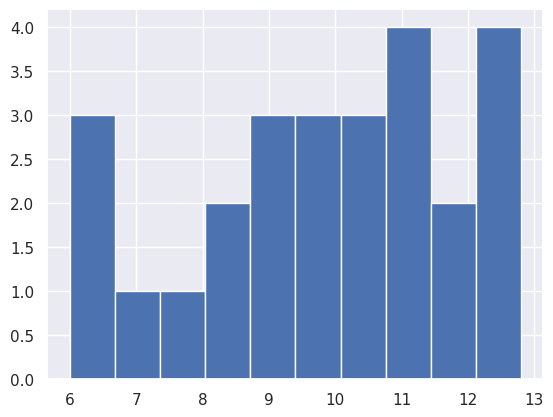

In [16]:
E, A, C, N, O = [], [], [], [], []
for id in vid: 
    E.append(TP[id][0])
    A.append(TP[id][1])
    C.append(TP[id][2])
    N.append(TP[id][3])
    O.append(TP[id][4])

e = [0 for _ in range(len(vid))]
a = [1 for _ in range(len(vid))]
c = [2 for _ in range(len(vid))]
n = [3 for _ in range(len(vid))]
o = [4 for _ in range(len(vid))]
# plt.scatter(e, E)
# plt.scatter(a, A)
# plt.scatter(c, C)
# plt.scatter(n, N)
# plt.scatter(o, O)
# plt.hlines(8, 0, 4, color='y', linestyles='dotted')
# plt.xticks([0, 1, 2, 3, 4], ['E', 'A', 'C', 'N', 'O'])
plt.hist(E)
plt.show()

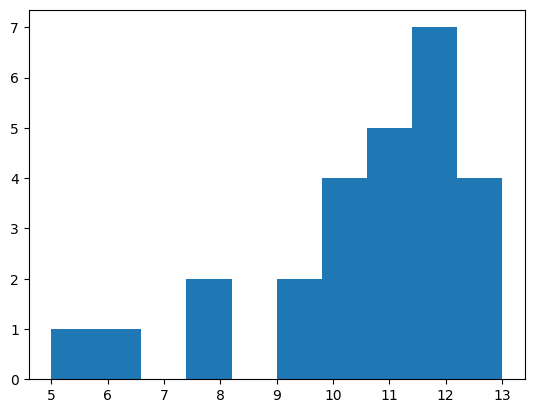

In [29]:
E, A, C, N, O = [], [], [], [], []
for id in vid: 
    E.append(SP[id][0])
    A.append(SP[id][1])
    C.append(SP[id][2])
    N.append(SP[id][3])
    O.append(SP[id][4])

e = [0 for _ in range(len(vid))]
a = [1 for _ in range(len(vid))]
c = [2 for _ in range(len(vid))]
n = [3 for _ in range(len(vid))]
o = [4 for _ in range(len(vid))]
# plt.scatter(e, E)
# plt.scatter(a, A)
# plt.scatter(c, C)
# plt.scatter(n, N)
# plt.scatter(o, O)
# plt.hlines(8, 0, 4, color='y', linestyles='dotted')
# plt.xticks([0, 1, 2, 3, 4], ['E', 'A', 'C', 'N', 'O'])
plt.show()